In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
import tensorflow as tf
import pathlib
import PIL
import time
import zipfile
import random
from tensorflow import keras as ks
from tensorflow.keras.layers import *
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from fastai.vision.all import *

In [3]:
train = pd.read_csv("../input/road-segment-identification/Train (4).csv")
train.head()

,Image_ID,Target
0,ID_0073qfb8,0
1,ID_00gy3vH2,1
2,ID_00uB3UFr,0
3,ID_012xZpNw,1
4,ID_014GgMRb,1


In [4]:
road = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    splitter=TrainTestSplitter(0.1, stratify=train["Target"]),
  get_x = ColReader(0),
    get_y=ColReader(1))

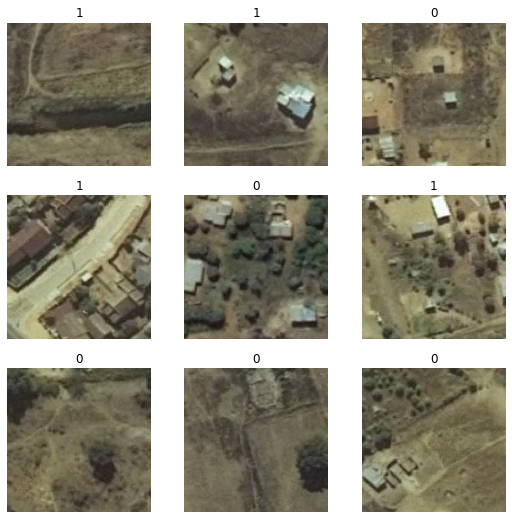

In [10]:
# Create the dataloaders
dls = ImageDataLoaders.from_df(train,bs=32, path='../input/road-segment-identification/Images/Images', suff='.tif', num_workers=4) # See the docs for adding augmentations etc
dls.show_batch() # View a batch with labels

In [11]:
import torch
torch.cuda.empty_cache()
import gc
gc.collect()

22722

In [12]:
 def random_seed(seed_value, use_cuda): 
    np.random.seed(seed_value)
 #cpu vars
    torch.manual_seed(seed_value) 
# cpu  vars
    random.seed(seed_value)
 # Python 
    if use_cuda: 
        torch.cuda.manual_seed(seed_value) 
        torch.cuda.manual_seed_all(seed_value) 
# gpu vars
        torch.backends.cudnn.deterministic = True 
 #needed
        torch.backends.cudnn.benchmark = False 
random_seed(2021,True) #i'm using seed 2021

In [13]:
import torchvision.models as models
learn = cnn_learner(dls, models.densenet161, cut=-1,metrics=error_rate,model_dir="/tmp/model/")

SuggestedLRs(valley=0.0030199517495930195)

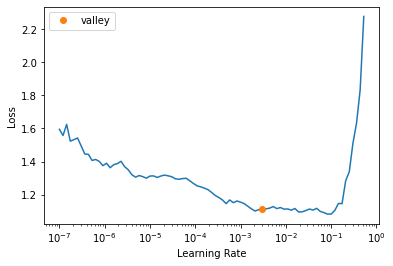

In [14]:
learn.lr_find()

In [15]:
learn.fine_tune(7 ,(0.3))

epoch,train_loss,valid_loss,error_rate,time
0,6.874877,444.675659,0.467143,01:23


epoch,train_loss,valid_loss,error_rate,time
0,2.370966,2167.312012,0.369286,01:52
1,1.566666,2.104204,0.370714,01:52
2,1.144664,0.640697,0.282143,01:53
3,0.729412,0.584508,0.275714,02:02
4,0.543386,70.796875,0.246429,02:02
5,0.456704,0.442534,0.212143,02:02
6,0.401774,0.814523,0.199286,02:02


In [16]:
test=pd.read_csv("../input/road-segment-identification/Test (6).csv")

In [ ]:
tdl = learn.dls.test_dl(test['Image_ID'].map(lambda s: '../input/road-segment-identification/Images/Images/'+s+'.tif').values)
preds = learn.get_preds(dl=tdl)

In [ ]:
preds

In [ ]:
test['Target'] = [float(p[1]) for p in preds[0].numpy()]

In [ ]:
test.head()

In [ ]:
test.to_csv('submission3.csv', index=False)